import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

In [21]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/breast-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\yasserh\breast-cancer-dataset\versions\1


In [22]:
import os 
import numpy as np
import pandas as pd
print(os.listdir(path))


['breast-cancer.csv']


In [23]:
file=os.path.join(path,'breast-cancer.csv')
data_set=pd.read_csv(file)

In [24]:
import pandas as pd

# Make Pandas show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)  # prevents wrapping
pd.set_option('display.colheader_justify', 'left')  # optional: align headers

# Now head() will display all columns
print(data_set.head())


   id       diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302  M         17.99        10.38         122.80          1001.0      
1    842517  M         20.57        17.77         132.90          1326.0      
2  84300903  M         19.69        21.25         130.00          1203.0      
3  84348301  M         11.42        20.38          77.58           386.1      
4  84358402  M         20.29        14.34         135.10          1297.0      

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0  0.11840          0.27760           0.3001          0.14710               
1  0.08474          0.07864           0.0869          0.07017               
2  0.10960          0.15990           0.1974          0.12790               
3  0.14250          0.28390           0.2414          0.10520               
4  0.10030          0.13280           0.1980          0.10430               

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

checking NAN values

In [25]:
print(data_set.isna().sum())

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


SCALING

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
COLS=['perimeter_worst','area_worst','radius_worst','texture_worst','area_se','radius_mean','texture_mean','perimeter_mean','area_mean','perimeter_se']
data_set[COLS]=scaler.fit_transform(data_set[COLS])

PREDICTIONS

FOR NON-LINEAR classification  (use kernel='rbf')

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
x=data_set.iloc[:,2:]
y=data_set.iloc[:,1]
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model=SVC(kernel='rbf')
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)

For LINEAR classification  (use kernel='linear')

In [28]:
X_train1,X_test1,Y_train1,Y_test1=train_test_split(x,y,test_size=0.2,random_state=10)
model2=SVC(kernel='linear')
model2.fit(X_train1,Y_train1)
y_predicts=model2.predict(X_test)

VISUALISING DECISION BOUNDARIES

In [29]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y_encoded=le.fit_transform(y)

In [30]:
for num, label in enumerate(le.classes_):
    print(f"{num} → {label}")


0 → B
1 → M


In [31]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(x)
X_t,X_te,Y_t,Y_te=train_test_split(X_pca,y_encoded,test_size=0.2,random_state=42)
model.fit(X_t,Y_t)

SVC()

In [32]:
Y=np.array(y_encoded)

VISUALS FOR svc ()

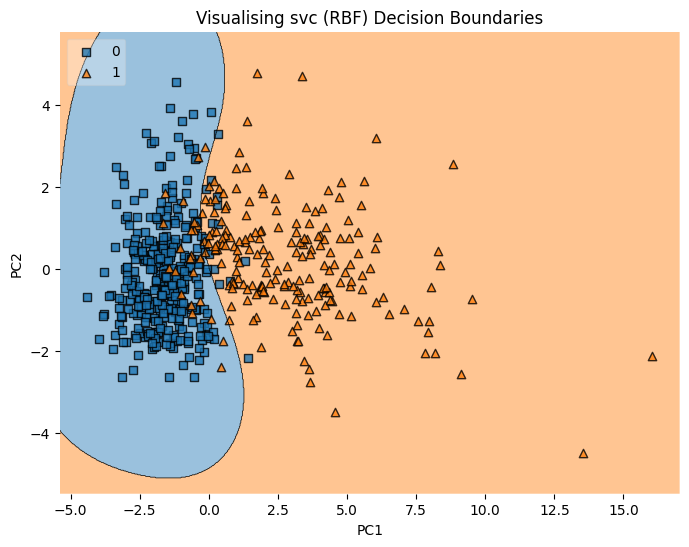

In [33]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plot_decision_regions(X_pca,Y,clf=model,legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualising svc (RBF) Decision Boundaries')
plt.show()

Tune hyperparameters like C and gamma

In [34]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],          # Regularization
    'gamma': [0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['rbf']                 # You can also try 'linear', 'poly', 'sigmoid'
}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5, verbose=0, scoring='accuracy')
grid.fit(X_train, Y_train)

print("Best parameters:",grid.best_params_)



Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


cross-validation to evaluate performance

In [35]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(estimator=model,X=X_train,y=Y_train,cv=10)
print('cross_val:{:.2f}%'.format(cross_val.mean()*100))
print('Standard_Deviation:{:.2f}%'.format(cross_val.std()*100))

cross_val:95.15%
Standard_Deviation:2.17%
